Reference Source: [data-enrichment-wk16-lect01-linear-regression-with-movies - Code Along](https://github.com/ericakitano/data-enrichment-wk16-lect01-linear-regression-with-movies/tree/week-of-07-18-23)

# 1. Import Library

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

# Set global scikit-learn configuration 
from sklearn import set_config

# Display estimators as a diagram
set_config(display='diagram')

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load Data

Load the data between 2000-2021 that I pulled from TMDB in Part 4.

In [2]:
df = pd.read_csv('Data/part4_tmdb_results_all.csv.gz', lineterminator='\n')
df.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63148 entries, 0 to 63147
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   backdrop_path          40883 non-null  object 
 2   belongs_to_collection  4257 non-null   object 
 3   budget                 63126 non-null  float64
 4   genres                 63126 non-null  object 
 5   homepage               15142 non-null  object 
 6   id                     63126 non-null  float64
 7   original_language      63126 non-null  object 
 8   original_title         63126 non-null  object 
 9   overview               61824 non-null  object 
 10  popularity             63126 non-null  float64
 11  poster_path            58195 non-null  object 
 12  production_companies   63126 non-null  object 
 13  production_countries   63126 non-null  object 
 14  release_date           62044 non-null  object 
 15  re

# 3. Clean Data

In [4]:
# remove ids that are NaN
df=df.loc[df['id'].isna()!=True]
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG
5,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.8,50.0,R


In [5]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head(2)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification
1,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,22.0,NaN
2,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,Released,For the Cause,5.1,8.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63126 entries, 1 to 63147
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  63126 non-null  float64
 1   belongs_to_collection  4257 non-null   object 
 2   budget                 63126 non-null  float64
 3   genres                 63126 non-null  object 
 4   popularity             63126 non-null  float64
 5   release_date           62044 non-null  object 
 6   revenue                63126 non-null  float64
 7   runtime                63126 non-null  float64
 8   status                 63126 non-null  object 
 9   title                  63126 non-null  object 
 10  vote_average           63126 non-null  float64
 11  vote_count             63126 non-null  float64
 12  certification          15242 non-null  object 
dtypes: float64(7), object(6)
memory usage: 6.7+ MB


In [7]:
#reset index
df = df.reset_index(drop=True)

In [8]:
df.head(2)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification
0,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,22.0,NaN
1,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,Released,For the Cause,5.1,8.0,NaN


## `belongs_to_collection`

In [9]:
#display how many movies belong to collection
df['belongs_to_collection'].notna().sum()

4257

In [10]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    58869
True      4257
Name: belongs_to_collection, dtype: int64

## `genre`

In [11]:
# display the values in genres
df['genres'][0]

"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [12]:
## Function to get just the genre names as a list 
import json

def get_genre_name(x):
 if type(x) == str:
    x = x.replace("'", '"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [13]:
## Use the function to get genre name
get_genre_name(df.loc[0, 'genres'])

['Comedy', 'Music', 'Romance']

In [14]:
## Use the function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,certification,genres_list
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,22.0,NaN,Comedy
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,22.0,NaN,Music
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,22.0,NaN,Romance
1,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,Released,For the Cause,5.1,8.0,NaN,Science Fiction
2,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.400,2000-04-14,0.0,152.0,Released,Gang,4.0,1.0,NaN,Drama


In [15]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [16]:
## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f'Genre_{genre}'] = df['genres'].str.contains(genre, regex = False)
    df[f'Genre_{genre}'] = df[f'Genre_{genre}'].astype(bool)
df.head(10)

,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,status,title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.718,2000-11-15,0.0,100.0,Released,For the Cause,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.400,2000-04-14,0.0,152.0,Released,Gang,...,False,False,False,False,False,False,False,False,False,False
3,0.0,True,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",25.092,2000-09-29,14204632.0,99.0,Released,In the Mood for Love,...,False,False,False,False,False,False,False,False,False,False
4,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",3.884,2000-09-02,0.0,99.0,Released,Chinese Coffee,...,False,False,False,False,False,False,False,False,False,False
5,0.0,True,15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",13.372,2000-04-19,0.0,88.0,Released,Heavy Metal 2000,...,True,False,False,False,False,False,False,False,False,False
6,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0.600,2000-08-24,0.0,86.0,Released,Love 101,...,False,False,False,False,False,False,False,False,False,False
7,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0.600,2000-11-09,0.0,98.0,Released,Nothing Sacred,...,False,False,False,False,False,False,False,False,False,False
8,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",10.910,2000-08-26,0.0,102.0,Released,State and Main,...,False,False,False,False,False,False,False,False,False,False
9,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.629,2000-10-06,80334.0,99.0,Released,Songs from the Second Floor,...,False,False,False,False,False,False,False,False,False,False


In [17]:
## Drop original genre cols
df = df.drop(columns = ['genres','genres_list'])

In [18]:
df.head()

,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,status,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,0.0,False,10000000.0,2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.5,...,False,False,False,False,False,False,False,False,False,False
1,0.0,False,0.0,1.718,2000-11-15,0.0,100.0,Released,For the Cause,5.1,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,0.0,1.400,2000-04-14,0.0,152.0,Released,Gang,4.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,True,150000.0,25.092,2000-09-29,14204632.0,99.0,Released,In the Mood for Love,8.1,...,False,False,False,False,False,False,False,False,False,False
4,0.0,False,0.0,3.884,2000-09-02,0.0,99.0,Released,Chinese Coffee,6.8,...,False,False,False,False,False,False,False,False,False,False


## `certification`

In [19]:
## Checking Certification values counts
df['certification'].value_counts(dropna = False)

NaN                                47884
R                                   6252
NR                                  3596
PG-13                               3288
PG                                  1472
G                                    457
NC-17                                167
Unrated                                5
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [20]:
# fix extra space
df['certification'] = df['certification'].str.strip()

In [21]:
## fix inconsistent values in the certification column
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      47885
R         6252
NR        3604
PG-13     3289
PG        1472
G          457
NC-17      167
Name: certification, dtype: int64

## Convert year to separate features

In [22]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    258
2010-01-01    229
2008-01-01    200
2011-01-01    195
2012-01-01    177
             ... 
2006-01-22      1
2006-03-05      1
2006-07-24      1
2012-07-30      1
2022-02-14      1
Name: release_date, Length: 7829, dtype: int64

In [23]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df

,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,status,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,0.0,False,10000000.0,2.498,2000-09-22,0.0,86.0,Released,The Fantasticks,5.500,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,0.0,False,0.0,1.718,2000-11-15,0.0,100.0,Released,For the Cause,5.100,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,0.0,False,0.0,1.400,2000-04-14,0.0,152.0,Released,Gang,4.000,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,0.0,True,150000.0,25.092,2000-09-29,14204632.0,99.0,Released,In the Mood for Love,8.100,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,0.0,False,0.0,3.884,2000-09-02,0.0,99.0,Released,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63121,0.0,False,0.0,1.561,2021-09-08,0.0,118.0,Released,Heiko's World,6.375,...,False,False,False,False,False,False,False,2021.0,9.0,8.0
63122,0.0,False,0.0,3.004,2021-11-19,0.0,101.0,Released,India Sweets and Spices,6.100,...,False,False,False,False,False,False,False,2021.0,11.0,19.0
63123,0.0,False,0.0,19.564,2022-01-21,0.0,91.0,Released,The Hunting,4.700,...,False,False,False,False,False,False,False,2022.0,1.0,21.0
63124,0.0,False,0.0,6.901,2021-12-07,0.0,87.0,Released,The Scrapper,6.000,...,False,False,False,False,False,False,False,2021.0,12.0,7.0


In [24]:
## drop original feature
df = df.drop(columns=['release_date'])

In [25]:
# View head of data
df.head()

,adult,belongs_to_collection,budget,popularity,revenue,runtime,status,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,0.0,False,10000000.0,2.498,0.0,86.0,Released,The Fantasticks,5.5,22.0,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,0.0,False,0.0,1.718,0.0,100.0,Released,For the Cause,5.1,8.0,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,0.0,False,0.0,1.400,0.0,152.0,Released,Gang,4.0,1.0,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,0.0,True,150000.0,25.092,14204632.0,99.0,Released,In the Mood for Love,8.1,2244.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,0.0,False,0.0,3.884,0.0,99.0,Released,Chinese Coffee,6.8,50.0,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


## Filter Data

- Only keep:
    1. Status=Released.
    2. Budget >0
    3. Revenue >0

In [26]:
## Check status
df['status'].value_counts()

Released           63112
Post Production       11
In Production          3
Name: status, dtype: int64

In [27]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,0.0,False,10000000.0,2.498,0.0,86.0,The Fantasticks,5.500,22.0,NaN,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,0.0,False,0.0,1.718,0.0,100.0,For the Cause,5.100,8.0,NaN,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,0.0,False,0.0,1.400,0.0,152.0,Gang,4.000,1.0,NaN,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,0.0,True,150000.0,25.092,14204632.0,99.0,In the Mood for Love,8.100,2244.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,0.0,False,0.0,3.884,0.0,99.0,Chinese Coffee,6.800,50.0,R,...,False,False,False,False,False,False,False,2000.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63121,0.0,False,0.0,1.561,0.0,118.0,Heiko's World,6.375,4.0,NaN,...,False,False,False,False,False,False,False,2021.0,9.0,8.0
63122,0.0,False,0.0,3.004,0.0,101.0,India Sweets and Spices,6.100,10.0,PG-13,...,False,False,False,False,False,False,False,2021.0,11.0,19.0
63123,0.0,False,0.0,19.564,0.0,91.0,The Hunting,4.700,34.0,NaN,...,False,False,False,False,False,False,False,2022.0,1.0,21.0
63124,0.0,False,0.0,6.901,0.0,87.0,The Scrapper,6.000,2.0,NaN,...,False,False,False,False,False,False,False,2021.0,12.0,7.0


In [28]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,0.0,True,150000.0,25.092,14204632.0,99.0,In the Mood for Love,8.100,2244.0,PG,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,0.0,False,120000.0,3.713,14904.0,87.0,Vulgar,5.500,44.0,R,...,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,0.0,True,45000000.0,49.069,224834564.0,84.0,Chicken Run,6.747,4396.0,G,...,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,0.0,False,8000000.0,10.955,105983.0,122.0,The Million Dollar Hotel,5.900,283.0,R,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,0.0,True,125000000.0,49.727,546388105.0,123.0,Mission: Impossible II,6.114,5877.0,PG-13,...,False,False,False,False,False,False,False,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63075,0.0,False,15000000.0,41.588,8804000.0,118.0,The Vault,6.854,780.0,R,...,False,False,False,False,False,False,False,2021.0,3.0,4.0
63085,0.0,True,200000000.0,81.353,14400000.0,138.0,The Tomorrow War,7.551,2643.0,PG-13,...,False,False,False,False,False,False,False,2021.0,9.0,3.0
63087,0.0,False,26000000.0,30.722,6416063.0,126.0,Judas and the Black Messiah,7.367,1297.0,NaN,...,True,False,False,False,False,False,False,2021.0,2.0,12.0
63101,0.0,True,17516235.0,11.811,19002036.0,120.0,Kaamelott: The First Chapter,6.653,611.0,NaN,...,False,False,False,False,False,False,False,2021.0,7.0,21.0


# 4. Train Test Split

In [29]:
# View info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 3 to 63102
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5424 non-null   float64
 1   belongs_to_collection  5424 non-null   bool   
 2   budget                 5424 non-null   float64
 3   popularity             5424 non-null   float64
 4   revenue                5424 non-null   float64
 5   runtime                5424 non-null   float64
 6   title                  5424 non-null   object 
 7   vote_average           5424 non-null   float64
 8   vote_count             5424 non-null   float64
 9   certification          4112 non-null   object 
 10  Genre_Comedy           5424 non-null   bool   
 11  Genre_Music            5424 non-null   bool   
 12  Genre_Romance          5424 non-null   bool   
 13  Genre_Science Fiction  5424 non-null   bool   
 14  Genre_Drama            5424 non-null   bool   
 15  Gen

In [30]:
## Make x and y variables
drop_for_model = ['title']

y = df['revenue'].copy()
X = df.drop(columns=['revenue',*drop_for_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,Genre_Comedy,Genre_Music,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
29737,0.0,False,17000000.0,43.741,104.0,6.470,2557.0,R,True,False,...,False,False,False,False,False,False,False,2014.0,8.0,13.0
1884,0.0,False,58000000.0,33.333,135.0,7.854,9312.0,PG-13,False,False,...,False,False,False,False,False,False,False,2001.0,12.0,11.0
41408,0.0,False,20000000.0,57.884,132.0,7.497,1922.0,PG-13,False,False,...,False,False,False,False,False,False,False,2017.0,3.0,3.0
17286,0.0,False,25000000.0,18.771,99.0,5.751,948.0,R,False,False,...,False,False,False,False,False,False,False,2010.0,11.0,6.0
52507,0.0,False,100000000.0,21.588,86.0,6.476,625.0,PG,True,False,...,False,True,False,False,False,False,False,2019.0,3.0,13.0


In [31]:
# Sum up NAs
X_train.isna().sum()

adult                      0
belongs_to_collection      0
budget                     0
popularity                 0
runtime                    0
vote_average               0
vote_count                 0
certification            983
Genre_Comedy               0
Genre_Music                0
Genre_Romance              0
Genre_Science Fiction      0
Genre_Drama                0
Genre_Action               0
Genre_Crime                0
Genre_Adventure            0
Genre_Animation            0
Genre_Fantasy              0
Genre_Horror               0
Genre_Thriller             0
Genre_History              0
Genre_Family               0
Genre_Mystery              0
Genre_Western              0
Genre_War                  0
Genre_TV Movie             0
Genre_Documentary          0
year                       7
month                      7
day                        7
dtype: int64

# 5. Preprocessor

In [32]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [33]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [34]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [35]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

In [36]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols),
                                       ('passthrough',already_ohe_cols))# remainder='passthrough')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', '...
                                ('passthrough', 'passthrough',
                                 ['belongs_to_collection', 'Genre_Comedy',
                                  'Genre_Music', 'Genre_Romance',
                                  'Genre_Science Fiction', 'Genre_Drama',
                                  'Genre_Action', 'Genre_Crime',
                                  'Genre_Adventure', 'Genre_Animation',
                                  'Genre_Fantasy', 'Genre_Horror',
                                  'Genre_Thriller', 'Genre_History',
                                  'Genre_Family', 'Genre_Mystery',
                                  'Genre_Western', 'Genre_War',
                                  'Genre_TV Movie', 'Genre_Documentary'])])

In [37]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-1']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [38]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-1'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*cat_features,*num_cols,*already_ohe_cols]
len(final_features)

36

In [39]:
## checking shape matches len final features
preprocessor.transform(X_train).shape

(4068, 36)

In [40]:
## make X_train_tf 
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
29737,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17000000.0,43.741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58000000.0,33.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41408,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20000000.0,57.884,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25000000.0,18.771,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52507,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,100000000.0,21.588,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
## make X_test_tf 
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
26440,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130000000.0,58.259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35000000.0,15.306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5000000.0,8.631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1358,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,57000000.0,14.701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3370,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8500000.0,13.914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Adding a Constant for Statsmodels

In [42]:
##import statsmodels
import statsmodels.api as sm

In [43]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=True)
X_test_df = sm.add_constant(X_test_tf, prepend=True)
display(X_train_df.head(2),X_test_df.head(2))

,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
29737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,const,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
26440,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,130000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 7. Modeling

## Statsmodels OLS

In [44]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     358.7
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:57:45   Log-Likelihood:                -80265.
No. Observations:                4068   AIC:                         1.606e+05
Df Residuals:                    4032   BIC:                         1.608e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.615e+08   4.47e+08     -1.033      0.302   -1.34e+09    4.14e+08
certification_G       -5.841e+07   6.42e+07     -0.909      0.363   -1.84e+08    6.75e+07
certification_MISSING -5.302e+07   6.45e+07     -0.822      0.411   -1.79e+08    7.34e+07
certification_NC-17   -7.954e+07   6.91e+07     -1.151      0.250   -2.15e+08    5.59e+07
certification_NR      -6.197e+07   6.45e+07     -0.961      0.336   -1.88e+08    6.44e+07
certification_PG      -5.552e+07   6.41e+07     -0.867      0.386   -1.81e+08    7.01e+07
certification_PG-13   -6.986e+07   6.39e+07     -1.093      0.274   -1.95e+08    5.54e+07
certification_R       -8.318e+07    6.4e+07     -1.301      0.193   -2.09e+08    4.22e+07
adult                  4.783e+07   6.59e+07      0.725      0.468   -8.14e+07    1.77e+08
budget                    1.7385      0.053     32.874      0.000       1.635       1.842
popularity              7.38e+04   2.96e+04      2.495      0.013    1.58e+04    1.32e+05
runtime                1.595e+05   7.89e+04      2.023      0.043    4895.318    3.14e+05
vote_average          -4.105e+06   1.39e+06     -2.958      0.003   -6.82e+06   -1.38e+06
vote_count             2.647e+04    601.008     44.049      0.000    2.53e+04    2.77e+04
year                   2.536e+05   2.54e+05      0.998      0.318   -2.44e+05    7.52e+05
month                 -4.311e+05   4.16e+05     -1.037      0.300   -1.25e+06    3.84e+05
day                    2.364e+05   1.65e+05      1.428      0.153   -8.81e+04    5.61e+05
belongs_to_collection  5.149e+07   3.82e+06     13.477      0.000     4.4e+07     5.9e+07
Genre_Comedy           3.432e+06    3.7e+06      0.928      0.353   -3.82e+06    1.07e+07
Genre_Music            1.336e+07   8.73e+06      1.531      0.126   -3.74e+06    3.05e+07
Genre_Romance          5.425e+06   4.08e+06      1.329      0.184   -2.58e+06    1.34e+07
Genre_Science Fiction -2.897e+07    5.3e+06     -5.463      0.000   -3.94e+07   -1.86e+07
Genre_Drama            7.383e+05   3.71e+06      0.199      0.842   -6.53e+06    8.01e+06
Genre_Action          -1.155e+07   3.96e+06     -2.916      0.004   -1.93e+07   -3.78e+06
Genre_Crime           -8.131e+06   4.46e+06     -1.822      0.069   -1.69e+07    6.19e+05
Genre_Adventure        5.818e+06   4.65e+06      1.252      0.210   -3.29e+06    1.49e+07
Genre_Animation        2.175e+07   7.55e+06      2.880      0.004    6.94e+06    3.65e+07
Genre_Fantasy         -1.396e+07   5.16e+06     -2.705      0.007   -2.41e+07   -3.84e+06
Genre_Horror           3.192e+06   5.33e+06      0.599      0.549   -7.25e+06    1.36e+07
Genre_Thriller        -3.111e+06   3.91e+06     -0.795      0.426   -1.08e+07    4.56e+06
Genre_History         -1.386e+07   6.81e+06     -2.034      0.042   -2.72e+07   -4.98e+05
Genre_Family          -

In [45]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.757
Testing R^2: 0.739


# 8. The Assumptions of Linear Regression

The 4 Assumptions of a Linear Regression are:
- Linearity: That the input features have a linear relationship with the target.
- Independence of features (Low Multicollinearity): That the features are not strongly related to other features.
- Normality: The model's residuals are approximately normally distributed.
- Homoscedasticity: The model residuals have equal variance across all predictions.

## QQ-Plot for Checking for Normality

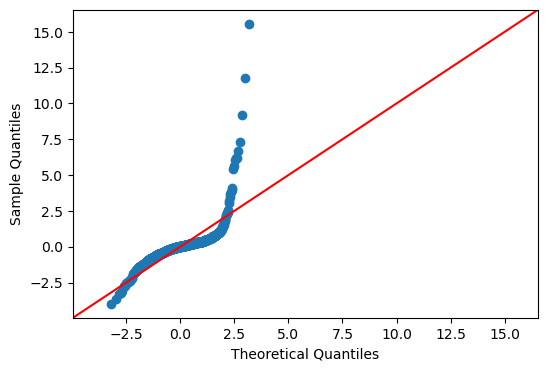

In [46]:
## Create a Q-QPlot

# first calculate residuals 
resid = y_test - y_hat_test

## then use sm's qqplot
fig, ax = plt.subplots(figsize=(6,4))
sm.graphics.qqplot(resid,line='45',fit=True,ax=ax);

## Residual Plot for Checking Homoscedasticity

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted Revenue')]

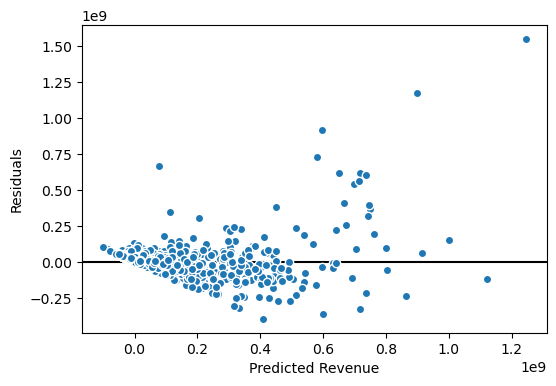

In [47]:
## Plot scatterplot with y_hat_test vs resids
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_hat_test, resid, ec='white')
ax.axhline(0,c='black',zorder=0)
ax.set(ylabel='Residuals',xlabel='Predicted Revenue')

# 9. Visualize Coefficients

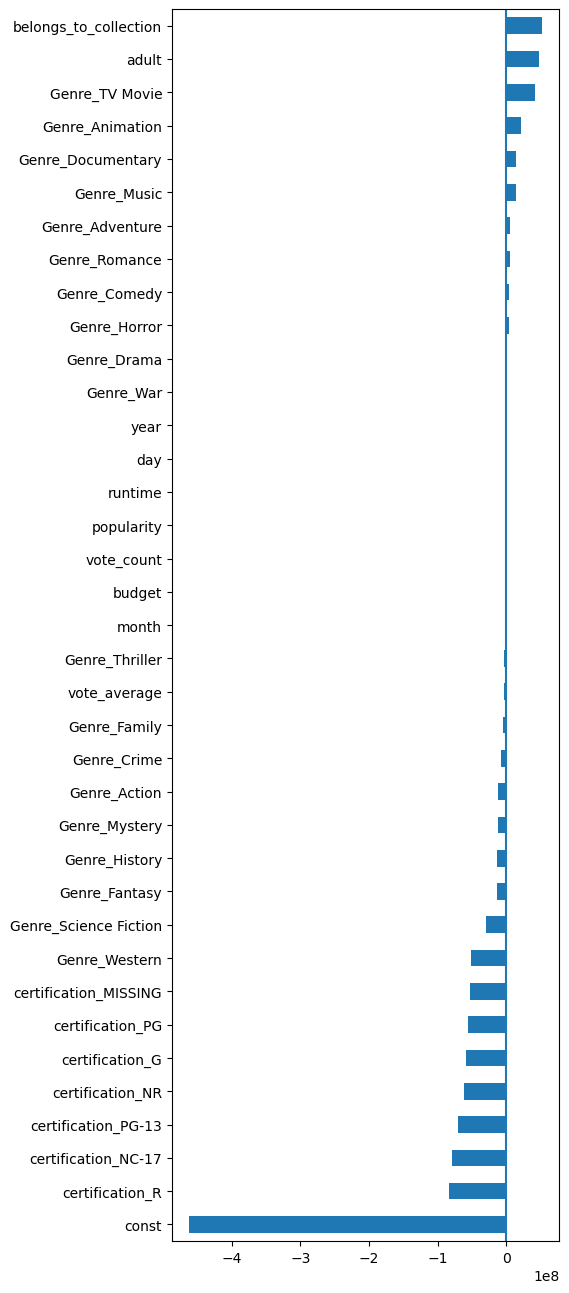

In [48]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

# 10. Improvements

### Define functions

In [49]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test


In [50]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    try:
        display(result.summary())
    except:
        pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

## Model-2:

In [51]:
df2 = df.copy()

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 3 to 63102
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5424 non-null   float64
 1   belongs_to_collection  5424 non-null   bool   
 2   budget                 5424 non-null   float64
 3   popularity             5424 non-null   float64
 4   revenue                5424 non-null   float64
 5   runtime                5424 non-null   float64
 6   title                  5424 non-null   object 
 7   vote_average           5424 non-null   float64
 8   vote_count             5424 non-null   float64
 9   certification          4112 non-null   object 
 10  Genre_Comedy           5424 non-null   bool   
 11  Genre_Music            5424 non-null   bool   
 12  Genre_Romance          5424 non-null   bool   
 13  Genre_Science Fiction  5424 non-null   bool   
 14  Genre_Drama            5424 non-null   bool   
 15  Gen

In [53]:
#drop the title column
df2=df2.drop(columns=['title'])

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 3 to 63102
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5424 non-null   float64
 1   belongs_to_collection  5424 non-null   bool   
 2   budget                 5424 non-null   float64
 3   popularity             5424 non-null   float64
 4   revenue                5424 non-null   float64
 5   runtime                5424 non-null   float64
 6   vote_average           5424 non-null   float64
 7   vote_count             5424 non-null   float64
 8   certification          4112 non-null   object 
 9   Genre_Comedy           5424 non-null   bool   
 10  Genre_Music            5424 non-null   bool   
 11  Genre_Romance          5424 non-null   bool   
 12  Genre_Science Fiction  5424 non-null   bool   
 13  Genre_Drama            5424 non-null   bool   
 14  Genre_Action           5424 non-null   bool   
 15  Gen

### Remove features based on p-values

In [55]:
## get pvalues from model result
pvals = result.pvalues 
pvals

const                     3.015504e-01
certification_G           3.631911e-01
certification_MISSING     4.109966e-01
certification_NC-17       2.497376e-01
certification_NR          3.363845e-01
certification_PG          3.861793e-01
certification_PG-13       2.744096e-01
certification_R           1.934968e-01
adult                     4.682298e-01
budget                   3.351330e-210
popularity                1.263461e-02
runtime                   4.317905e-02
vote_average              3.111609e-03
vote_count                0.000000e+00
year                      3.181288e-01
month                     2.997997e-01
day                       1.533082e-01
belongs_to_collection     1.589383e-40
Genre_Comedy              3.532857e-01
Genre_Music               1.257342e-01
Genre_Romance             1.838416e-01
Genre_Science Fiction     4.967721e-08
Genre_Drama               8.422285e-01
Genre_Action              3.568047e-03
Genre_Crime               6.855476e-02
Genre_Adventure          

In [56]:
## Check for p-values that are >.05
pvals[ pvals>.05]

const                    0.301550
certification_G          0.363191
certification_MISSING    0.410997
certification_NC-17      0.249738
certification_NR         0.336384
certification_PG         0.386179
certification_PG-13      0.274410
certification_R          0.193497
adult                    0.468230
year                     0.318129
month                    0.299800
day                      0.153308
Genre_Comedy             0.353286
Genre_Music              0.125734
Genre_Romance            0.183842
Genre_Drama              0.842229
Genre_Crime              0.068555
Genre_Adventure          0.210486
Genre_Horror             0.549132
Genre_Thriller           0.426453
Genre_Family             0.445587
Genre_War                0.963329
Genre_TV Movie           0.649145
Genre_Documentary        0.739766
dtype: float64

In [57]:
## Get list of ALL genre columns to see how many are sig
genre_cols = [c for c in df2.columns if c.startswith("Genre")]
genre_cols

['Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary']

In [58]:
## save just genre pvalues
genre_pvals = pvals[genre_cols] > 0.05
## calc what % are insig?
genre_pvals.value_counts(normalize = True)

True     0.631579
False    0.368421
dtype: float64

`genre` column has >50% non-significant pvalues, so we can drop this column.

In [59]:
## drop genre_cols and check what pvals are remaining
other_pvals = pvals.drop([*genre_cols])
other_pvals[other_pvals>.05]

const                    0.301550
certification_G          0.363191
certification_MISSING    0.410997
certification_NC-17      0.249738
certification_NR         0.336384
certification_PG         0.386179
certification_PG-13      0.274410
certification_R          0.193497
adult                    0.468230
year                     0.318129
month                    0.299800
day                      0.153308
dtype: float64

In [60]:
df2 = df2.drop(columns=[*genre_cols])

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5424 entries, 3 to 63102
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5424 non-null   float64
 1   belongs_to_collection  5424 non-null   bool   
 2   budget                 5424 non-null   float64
 3   popularity             5424 non-null   float64
 4   revenue                5424 non-null   float64
 5   runtime                5424 non-null   float64
 6   vote_average           5424 non-null   float64
 7   vote_count             5424 non-null   float64
 8   certification          4112 non-null   object 
 9   year                   5415 non-null   float64
 10  month                  5415 non-null   float64
 11  day                    5415 non-null   float64
dtypes: bool(1), float64(10), object(1)
memory usage: 513.8+ KB


### Remove Outliers

In [62]:
from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [63]:
## save a dictionary of the T/F outlier index for each feature in outlier_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}
for col in outlier_cols:
    outliers_col = find_outliers(df[col])
    outliers[col] = outliers_col

- 63 outliers found in runtime using Z-Scores.
- 30 outliers found in popularity using Z-Scores.
- 137 outliers found in revenue using Z-Scores.


In [64]:
# Make new copy of df2
df2 = df2.copy()

## loop through dictionary to remove outliers
for col, idx_outliers in outliers.items():
    df2 = df2[~idx_outliers]
df2

,adult,belongs_to_collection,budget,popularity,revenue,runtime,vote_average,vote_count,certification,year,month,day
3,0.0,True,150000.0,25.092,14204632.0,99.0,8.100,2244.0,PG,2000.0,9.0,29.0
10,0.0,False,120000.0,3.713,14904.0,87.0,5.500,44.0,R,2002.0,4.0,26.0
12,0.0,True,45000000.0,49.069,224834564.0,84.0,6.747,4396.0,G,2000.0,6.0,23.0
15,0.0,False,8000000.0,10.955,105983.0,122.0,5.900,283.0,R,2000.0,2.0,9.0
16,0.0,True,125000000.0,49.727,546388105.0,123.0,6.114,5877.0,PG-13,2000.0,5.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63075,0.0,False,15000000.0,41.588,8804000.0,118.0,6.854,780.0,R,2021.0,3.0,4.0
63085,0.0,True,200000000.0,81.353,14400000.0,138.0,7.551,2643.0,PG-13,2021.0,9.0,3.0
63087,0.0,False,26000000.0,30.722,6416063.0,126.0,7.367,1297.0,NaN,2021.0,2.0,12.0
63101,0.0,True,17516235.0,11.811,19002036.0,120.0,6.653,611.0,NaN,2021.0,7.0,21.0


### Train Test Split, Model, Evaluate

In [65]:
## Make x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df2)
## MAKE AND EVALUATE OLS
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

In [66]:
## Fit the model
result2 = model.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     681.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:57:46   Log-Likelihood:                -75121.
No. Observations:                3908   AIC:                         1.503e+05
Df Residuals:                    3891   BIC:                         1.504e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G        4.213e+06   5.42e+07      0.078      0.938   -1.02e+08     1.1e+08
certification_MISSING     1.2198      0.032     38.082      0.000       1.157       1.283
certification_NC-17    2.553e+05   7.37e+04      3.462      0.001    1.11e+05       4e+05
certification_NR       4.977e+04    5.1e+04      0.976      0.329   -5.02e+04     1.5e+05
certification_PG      -8.946e+05   8.27e+05     -1.082      0.279   -2.52e+06    7.27e+05
certification_PG-13    1.841e+04    487.304     37.786      0.000    1.75e+04    1.94e+04
certification_R       -5.725e+05   1.55e+05     -3.687      0.000   -8.77e+05   -2.68e+05
adult                 -3.084e+05   2.54e+05     -1.217      0.224   -8.05e+05    1.89e+05
budget                 1.717e+04   1.01e+05      0.170      0.865   -1.81e+05    2.15e+05
popularity             1.659e+08    3.9e+07      4.254      0.000    8.95e+07    2.42e+08
runtime                 1.43e+08   3.95e+07      3.624      0.000    6.56e+07     2.2e+08
vote_average           1.404e+08   4.19e+07      3.353      0.001    5.83e+07    2.23e+08
vote_count             1.361e+08   3.94e+07      3.455      0.001    5.88e+07    2.13e+08
year                   1.559e+08   3.91e+07      3.989      0.000    7.93e+07    2.33e+08
month                   1.38e+08    3.9e+07      3.539      0.000    6.15e+07    2.14e+08
day                    1.245e+08    3.9e+07      3.192      0.001     4.8e+07    2.01e+08
belongs_to_collection   3.24e+07   2.29e+06     14.125      0.000    2.79e+07    3.69e+07
const                  1.004e+09   2.73e+08      3.681      0.000    4.69e+08    1.54e+09
==============================================================================
Omnibus:                     1545.493   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30025.318
Skew:                           1.393   Prob(JB):                         0.00
Kurtosis:                      16.290   Cond. No.                     1.72e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

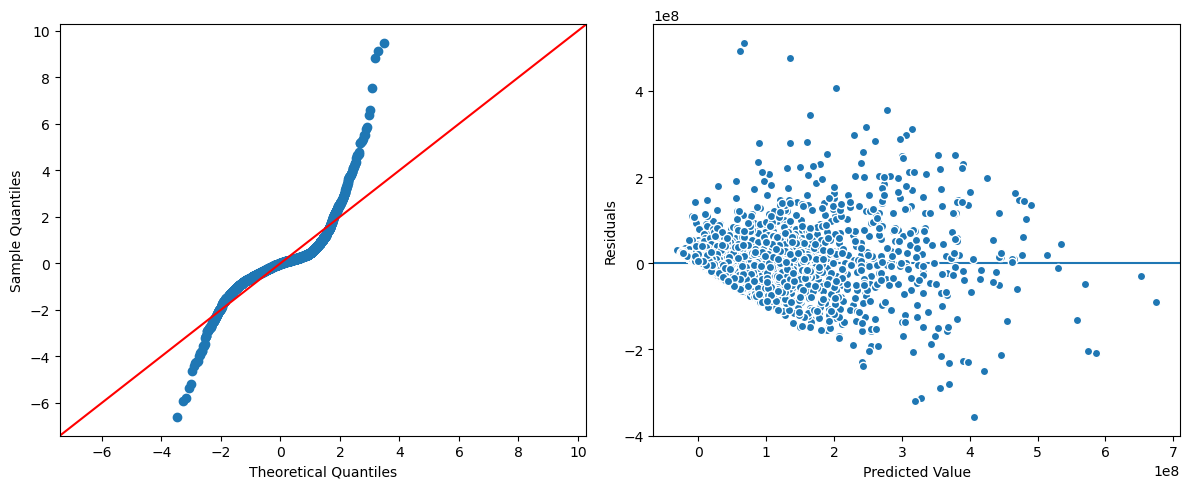

In [67]:
#view the summary
evaluate_ols(result2,X_train_df,y_train)

## Model-3: 

### Address Multicollinearity

#### Variance Inflation Factor

In [68]:
df3=df2.copy()

In [69]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5211 entries, 3 to 63102
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  5211 non-null   float64
 1   belongs_to_collection  5211 non-null   bool   
 2   budget                 5211 non-null   float64
 3   popularity             5211 non-null   float64
 4   revenue                5211 non-null   float64
 5   runtime                5211 non-null   float64
 6   vote_average           5211 non-null   float64
 7   vote_count             5211 non-null   float64
 8   certification          3933 non-null   object 
 9   year                   5203 non-null   float64
 10  month                  5203 non-null   float64
 11  day                    5203 non-null   float64
dtypes: bool(1), float64(10), object(1)
memory usage: 493.6+ KB


In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,adult,budget,popularity,runtime,vote_average,vote_count,year,month,day,belongs_to_collection,const
10469,-0.000256,3.260567e+07,-4.418166,1.0348,-0.47088,-873.732344,-3.571502,-2.811379,-4.419785,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,-0.265609,0.664534,-0.204964,0.0
1560,-0.000256,1.810669e+06,-11.686166,10.0348,-0.64888,-1626.732344,-9.571502,4.188621,4.580215,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,-0.265609,0.664534,-0.204964,0.0
16536,-0.000256,-2.468933e+07,-15.407166,-10.9652,-0.04888,-1648.732344,-1.571502,4.188621,10.580215,-0.015865,0.752559,-0.002559,-0.033521,-0.099539,-0.265609,-0.335466,0.795036,0.0
15279,-0.000256,-1.568933e+07,-7.465166,-6.9652,-0.77588,-1191.732344,-1.571502,2.188621,-6.419785,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,-0.265609,0.664534,-0.204964,0.0
23761,-0.000256,-2.211741e+07,-9.953166,37.0348,-0.84888,-1609.732344,1.428498,-2.811379,-10.419785,-0.015865,0.752559,-0.002559,-0.033521,-0.099539,-0.265609,-0.335466,0.795036,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8492,-0.000256,-2.598933e+07,-8.788166,49.0348,0.89912,-1313.732344,-4.571502,-5.811379,10.580215,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,0.734391,-0.335466,-0.204964,0.0
38452,-0.000256,-2.118933e+07,-10.527166,11.0348,1.09412,-662.732344,5.428498,5.188621,12.580215,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,-0.265609,0.664534,-0.204964,0.0
2047,-0.000256,-8.389331e+06,-5.358166,29.0348,0.61612,-748.732344,-9.571502,4.188621,-8.419785,-0.015865,-0.247441,-0.002559,-0.033521,-0.099539,-0.265609,0.664534,-0.204964,0.0
17198,-0.000256,1.810669e+06,-14.073166,29.0348,0.37412,-1516.732344,-0.571502,2.188621,5.580215,-0.015865,0.752559,-0.002559,-0.033521,-0.099539,-0.265609,-0.335466,-0.204964,0.0


In [71]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new series to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF

certification_G          1.004562
certification_MISSING    1.835469
certification_NC-17      2.378082
certification_NR         1.219972
certification_PG         1.224500
certification_PG-13      2.216290
certification_R          1.087669
adult                    1.011309
budget                   1.005047
popularity                    inf
runtime                       inf
vote_average                  inf
vote_count                    inf
year                          inf
month                         inf
day                           inf
belongs_to_collection    1.146578
const                         NaN
dtype: float64

In [72]:
## Sort VIF for inspect
VIF.sort_values()

certification_G          1.004562
budget                   1.005047
adult                    1.011309
certification_R          1.087669
belongs_to_collection    1.146578
certification_NR         1.219972
certification_PG         1.224500
certification_MISSING    1.835469
certification_PG-13      2.216290
certification_NC-17      2.378082
day                           inf
popularity                    inf
runtime                       inf
vote_average                  inf
vote_count                    inf
year                          inf
month                         inf
const                         NaN
dtype: float64

In [73]:
## Set float format to view vals not in scientfic notation
pd.set_option('display.float_format',lambda x: f'{x:.2f}')

In [74]:
## remove infinite values from VIF and sort
VIF = VIF[VIF!=np.inf].sort_values()
VIF

certification_G         1.00
budget                  1.01
adult                   1.01
certification_R         1.09
belongs_to_collection   1.15
certification_NR        1.22
certification_PG        1.22
certification_MISSING   1.84
certification_PG-13     2.22
certification_NC-17     2.38
const                    NaN
dtype: float64

In [75]:
## filter for VIF that are > 5
VIF[VIF>5]

Series([], dtype: float64)

In [76]:
high_vif = VIF[VIF>5].index
high_vif

Index([], dtype='object')

In [77]:
## df3
df3 = df3.drop(columns =high_vif).copy()

### Train Test Split, Model, Evaluate

In [78]:
# Train Test Split
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df3)

In [79]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

In [80]:
## Fit the model
result = model.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     697.2
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:57:46   Log-Likelihood:                -75161.
No. Observations:                3908   AIC:                         1.504e+05
Df Residuals:                    3891   BIC:                         1.505e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G        1.071e+06   3.88e+07      0.028      0.978   -7.49e+07    7.71e+07
certification_MISSING     1.2412      0.032     38.546      0.000       1.178       1.304
certification_NC-17    4.403e+05   7.34e+04      5.998      0.000    2.96e+05    5.84e+05
certification_NR       9.286e+04   5.14e+04      1.807      0.071   -7871.257    1.94e+05
certification_PG      -7.275e+05   8.31e+05     -0.875      0.381   -2.36e+06    9.02e+05
certification_PG-13    1.778e+04    474.055     37.509      0.000    1.69e+04    1.87e+04
certification_R       -5.311e+05   1.58e+05     -3.370      0.001    -8.4e+05   -2.22e+05
adult                 -9.432e+04   2.56e+05     -0.368      0.713   -5.97e+05    4.08e+05
budget                 6.687e+04   1.02e+05      0.655      0.512   -1.33e+05    2.67e+05
popularity             1.433e+08   3.97e+07      3.612      0.000    6.55e+07    2.21e+08
runtime                1.338e+08      4e+07      3.342      0.001    5.53e+07    2.12e+08
vote_average           1.237e+08   4.23e+07      2.925      0.003    4.08e+07    2.07e+08
vote_count             1.297e+08      4e+07      3.241      0.001    5.13e+07    2.08e+08
year                   1.455e+08   3.97e+07      3.663      0.000    6.76e+07    2.23e+08
month                   1.28e+08   3.96e+07      3.233      0.001    5.04e+07    2.06e+08
day                    1.157e+08   3.96e+07      2.921      0.004     3.8e+07    1.93e+08
belongs_to_collection   3.24e+07   2.32e+06     13.989      0.000    2.79e+07    3.69e+07
const                  9.197e+08   2.77e+08      3.323      0.001    3.77e+08    1.46e+09
==============================================================================
Omnibus:                     1509.772   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24061.441
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                      14.825   Cond. No.                     2.38e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

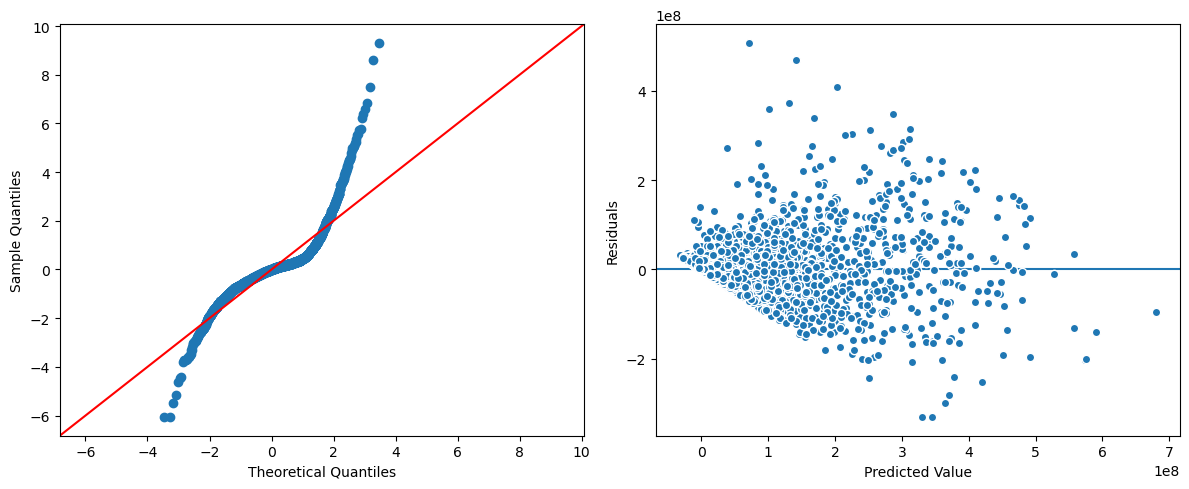

In [81]:
# View the summary
evaluate_ols(result,X_train_df,y_train)

In [82]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.741
Testing R^2: 0.731


## Visualize Coefficient of Final Model (Model3)

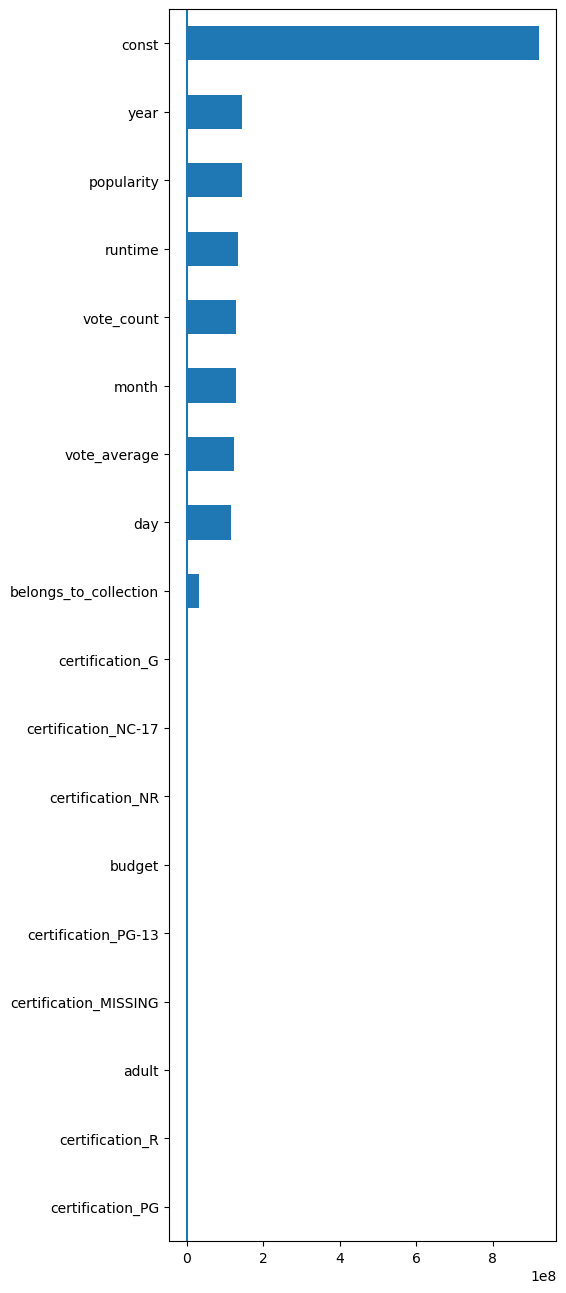

In [83]:
plt.figure(figsize=(5,16))
ax =result.params.sort_values().plot(kind='barh')
ax.axvline()

# Final Recommendation

**SUMMARY**: The features (columns) that show highest coefficient (highest correlation with the target ('revenue')) are:
  - year
  - popularity
  - runtime
  - vote_count
    